In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-temperature-records-1850-2022/GlobalLandTemperatures_GlobalLandTemperaturesByMajorCity.csv


In [2]:
df = pd.read_csv('/kaggle/input/global-temperature-records-1850-2022/GlobalLandTemperatures_GlobalLandTemperaturesByMajorCity.csv')
df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             239177 non-null  object 
 1   AverageTemperature             228175 non-null  float64
 2   AverageTemperatureUncertainty  228175 non-null  float64
 3   City                           239177 non-null  object 
 4   Country                        239177 non-null  object 
 5   Latitude                       239177 non-null  object 
 6   Longitude                      239177 non-null  object 
dtypes: float64(2), object(5)
memory usage: 12.8+ MB


Data has 6 columns.  
Having shape of (239177,8)

In [4]:
df.describe(include='all')

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
count,239177,228175.000000,228175.000000,239177,239177,239177,239177
unique,3239,NaN,NaN,100,49,49,93
top,1983-12-01,NaN,NaN,Rome,India,31.35N,31.38E
freq,100,NaN,NaN,3239,36582,13875,6801
mean,NaN,18.125969,0.969343,NaN,NaN,NaN,NaN
std,NaN,10.024800,0.979644,NaN,NaN,NaN,NaN
min,NaN,-26.772000,0.040000,NaN,NaN,NaN,NaN
25%,NaN,12.710000,0.340000,NaN,NaN,NaN,NaN
50%,NaN,20.428000,0.592000,NaN,NaN,NaN,NaN
75%,NaN,25.918000,1.320000,NaN,NaN,NaN,NaN


* Average temperature recorded is 18.12 having a range of +-(10.02).  
* Minimum temperature recorded is -23.77.
* Maximum temperature recorded is 39.28.


In [5]:
df.isna().sum()

dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

AverageTemperature & AverageTemperatureUncertainty contains null values.

# Treating Null Values

In [6]:
for col in df.columns:
    if df[col].dtype != 'object':
        df[col] = df[col].fillna(df[col].mean())

Filled the null values with mean

In [7]:
df.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [8]:
df['dt'] = pd.to_datetime(df['dt'])

In [9]:
temp_by_countries = df.groupby('Country')['AverageTemperature'].mean().sort_values(ascending=False).reset_index()
temp_by_countries = pd.DataFrame(temp_by_countries)
temp_by_countries

,Country,AverageTemperature
0,Sudan,28.556238
1,Thailand,26.688206
2,Burma,26.468317
3,Philippines,26.431895
4,Vietnam,26.409290
5,Saudi Arabia,25.937089
6,Somalia,25.838257
7,Dominican Republic,25.735425
8,Singapore,25.733439
9,Nigeria,25.556793


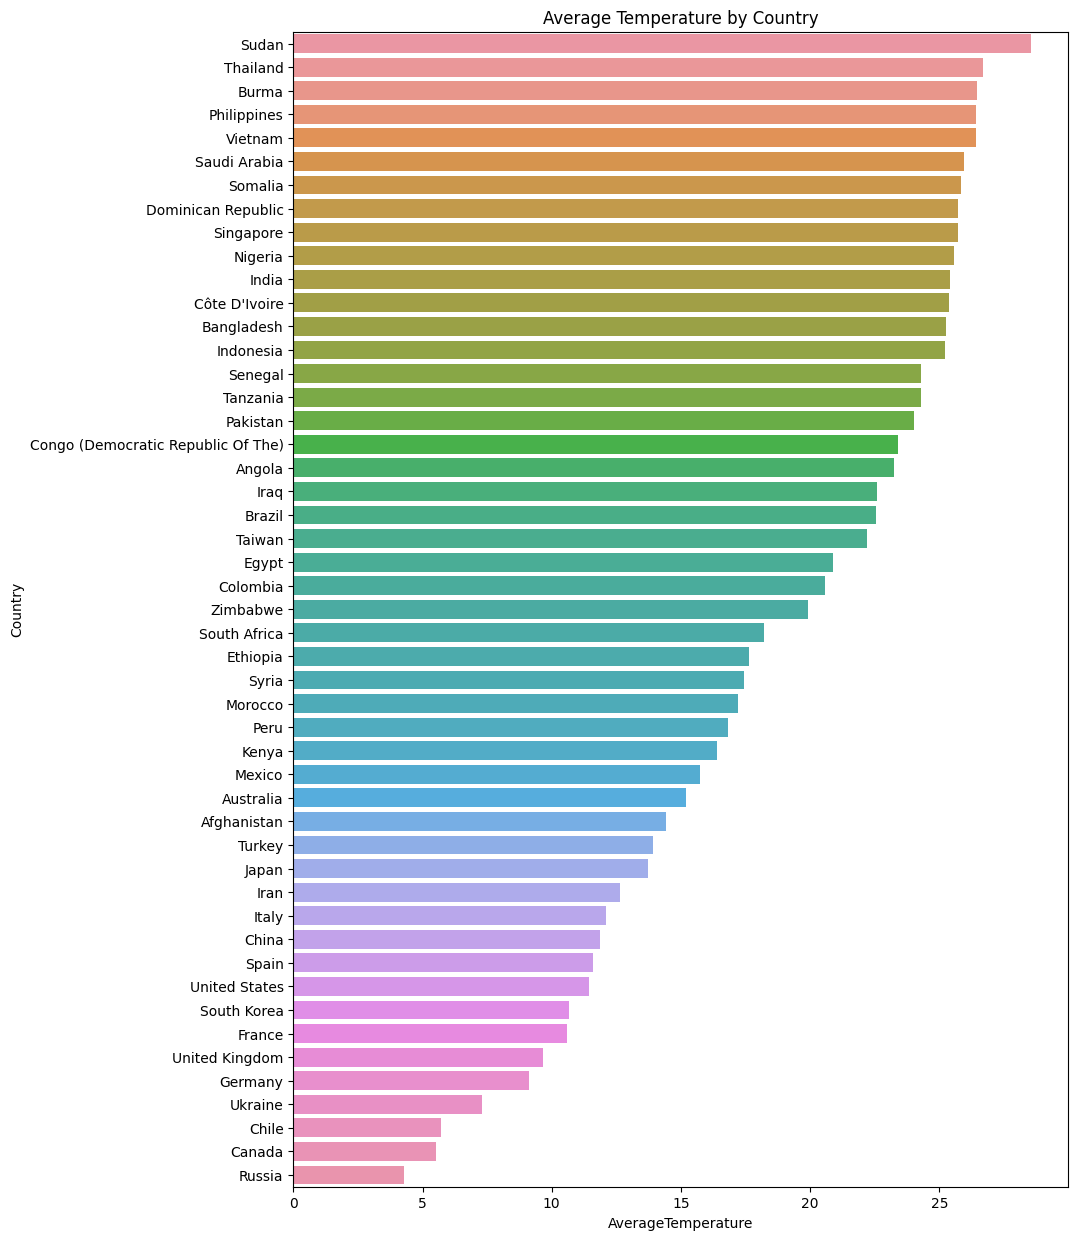

In [10]:
plt.figure(figsize=(10,15))
sns.barplot(data=temp_by_countries, y=temp_by_countries['Country'], x=temp_by_countries['AverageTemperature'])
plt.title('Average Temperature by Country')
plt.show()

Sudal is the most hotest country followed by Thailand than Burma.

In [11]:
avgtemp_by_countries = df.groupby('Country')['AverageTemperatureUncertainty'].mean().sort_values(ascending=False).reset_index()
avgtemp_by_countries = pd.DataFrame(avgtemp_by_countries)
avgtemp_by_countries

,Country,AverageTemperatureUncertainty
0,United Kingdom,1.594547
1,Germany,1.582287
2,France,1.581564
3,Italy,1.540129
4,Russia,1.485656
5,Ukraine,1.461807
6,Spain,1.458299
7,Turkey,1.381222
8,Morocco,1.314345
9,Canada,1.297577


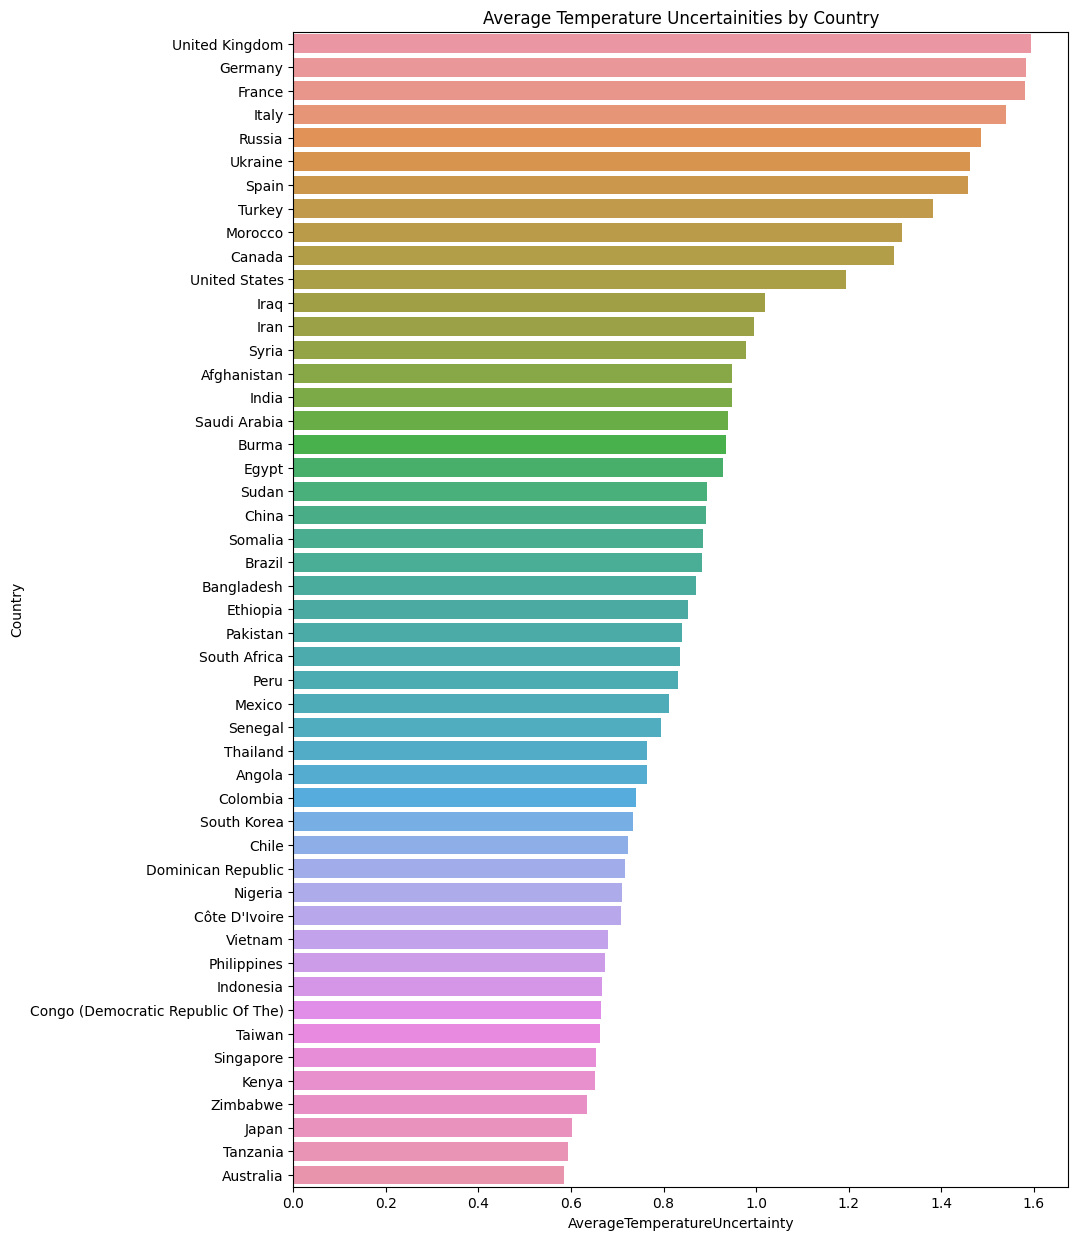

In [12]:
plt.figure(figsize=(10,15))
sns.barplot(data=avgtemp_by_countries, y=avgtemp_by_countries['Country'], x=avgtemp_by_countries['AverageTemperatureUncertainty'])
plt.title('Average Temperature Uncertainities by Country')
plt.show()

UK has the most uncertain Avg Temperature followed by Germany,France and Italy.

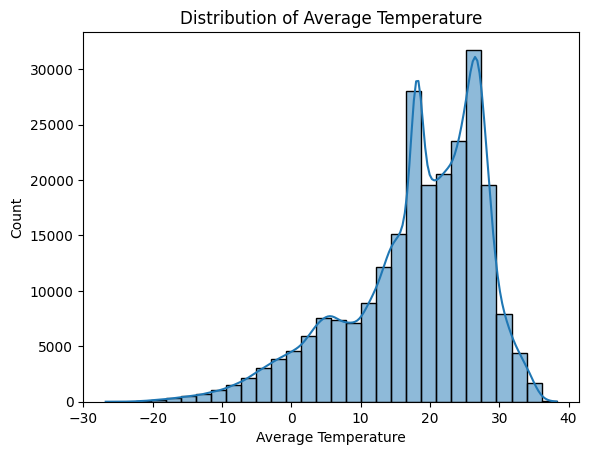

In [13]:
sns.histplot(df['AverageTemperature'],bins=30,kde=True)
plt.title('Distribution of Average Temperature')
plt.xlabel('Average Temperature')
plt.show()

In [14]:
df1 = df[['dt','AverageTemperature']]
df1

,dt,AverageTemperature
0,1849-01-01,26.704000
1,1849-02-01,27.434000
2,1849-03-01,28.101000
3,1849-04-01,26.140000
4,1849-05-01,25.427000
...,...,...
239172,2013-05-01,18.979000
239173,2013-06-01,23.522000
239174,2013-07-01,25.251000
239175,2013-08-01,24.528000


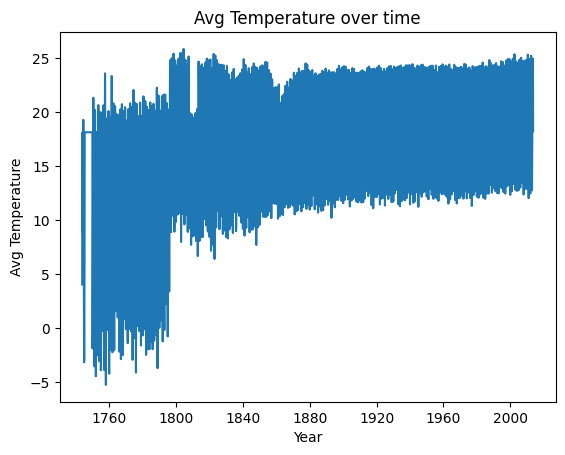

In [15]:
plt.plot(df1.groupby('dt')['AverageTemperature'].mean())
plt.xlabel('Year')
plt.ylabel('Avg Temperature')
plt.title('Avg Temperature over time')
plt.show()

To Be Continued...